In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns;
import random
from scipy import integrate
plt.rcParams['figure.figsize'] = [10, 10]


In [2]:
name = []
for i in range(0,39):
    name.append(i)
data = pd.read_table("TS_parameters.dat",names = name)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
1,3,92.226843,64.103448,33.238444,60.431682,0.353730,0.592057,0.361437,0.233254,4.590943,...,0.026879,4.920429,5.0,86.028476,3.845966,5.0,17.118309,1.522457,2.0,67.549634
2,4,41.653071,78.848110,88.903325,86.844385,0.568970,0.210528,0.501165,0.993139,2.349084,...,0.043676,2.966159,1.0,42.974778,2.402528,4.0,34.094213,10.456345,6.0,79.551000
3,3,90.797363,97.009746,14.640918,90.042360,0.459911,0.810461,0.293492,0.339315,4.123649,...,0.010986,5.107971,6.0,11.462402,4.703531,5.0,63.406978,15.296861,2.0,92.220893
4,2,68.830603,74.907142,90.383648,99.582754,0.833520,0.264843,0.249321,0.971902,1.260727,...,0.021517,5.683656,3.0,77.638190,3.914257,3.0,33.352850,14.245862,5.0,98.548766
5,1,41.430798,75.419256,88.653746,3.850175,0.144067,0.118836,0.223660,0.505535,0.237437,...,0.016774,2.341902,1.0,79.720376,1.119606,2.0,74.099141,19.758831,6.0,60.084156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,4,73.600859,15.389422,59.285581,21.327445,0.391159,0.526196,0.593798,0.576113,1.315099,...,0.010794,0.466162,4.0,31.289595,5.439231,3.0,12.357643,8.700401,4.0,52.677582
997,2,33.519240,7.988231,12.678894,60.014711,0.694431,0.845576,0.869650,0.705941,3.554974,...,0.022953,0.084012,4.0,48.018228,3.407128,2.0,71.673398,9.105396,5.0,47.457449
998,2,57.220799,38.716091,69.625206,16.922766,0.993977,0.859367,0.457100,0.631309,1.590341,...,0.039520,5.462422,3.0,30.921451,5.638453,2.0,39.377722,14.540589,2.0,23.288278
999,3,28.169191,50.484621,31.118336,38.960310,0.736237,0.944257,0.117562,0.239429,3.052712,...,0.011528,3.816046,1.0,67.170713,5.757969,4.0,94.137809,23.989589,3.0,20.148470


In [4]:
def hill(X,X0,l,n):
    
    Hplus = (X**n)/(X**n + X0**n)
    Hminus = (X0**n)/(X**n + X0**n)
    
    H = l*Hplus + Hminus
    
    if l>1:
        H = H/l
    return H


In [5]:
dh1dt = 0
dh4dt = 0
dsrdt = 0
dppdt = 0

def par(x):
    parm = data.iloc[x].to_numpy()
    return parm
parm = par(0)
def f(s,t):
    
    h4 = s[0]
    h1 = s[1]
    pp = s[2]
    sr = s[3]
    
    gh1 = parm[1]
    gh4 = parm[2]
    gpp = parm[3]
    gsr = parm[4]
    dgh1 = parm[5]
    dgh4 = parm[6]
    dgpp = parm[7]
    dgsr = parm[8]

    trdh4toh1 = parm[9]
    nh4toh1 = parm[10]
    lh4toh1 = parm[11]

    trdh1toh1 = parm[12]
    nh1toh1 = parm[13]
    lh1toh1 = parm[14]

    trdh1toh4 = parm[15]
    nh1toh4 = parm[16]
    lh1toh4 = parm[17]

    trdsrtoh4 = parm[18]
    nsrtoh4 = parm[19]
    lsrtoh4 = parm[20]

    trdh4toh4 = parm[21]
    nh4toh4 = parm[22]
    lh4toh4 = parm[23]

    trdsrtopp = parm[24]
    nsrtopp = parm[25]
    lsrtopp = parm[26]

    trdh1topp = parm[27]
    nh1topp = parm[28]
    lh1topp = parm[29]

    trdpptopp = parm[30]
    npptopp = parm[31]
    lpptopp = parm[32]

    trdpptosr = parm[33]
    npptosr = parm[34]
    lpptosr = parm[35]

    trdsrtosr = parm[36]
    nsrtosr = parm[37]
    lsrtosr = parm[38]

    
    Hh4toh1 = hill(h4,trdh4toh1,lh4toh1,nh4toh1)
    Hh1toh1 = hill(h1,trdh1toh1,lh1toh1,nh1toh1)
    Hh1toh4 = hill(h1,trdh1toh4,lh1toh4,nh1toh4)
    Hh4toh4 = hill(h1,trdh4toh4,lh4toh4,nh4toh4)

    Hsrtopp = hill(sr,trdsrtopp,lsrtopp,nsrtopp)
    Hpptosr = hill(pp,trdpptosr,lpptosr,npptosr)
    Hpptopp = hill(pp,trdpptopp,lpptopp,npptopp)
    Hsrtosr = hill(sr,trdsrtosr,lsrtosr,nsrtosr)

    Hsrtoh4 = hill(sr,trdsrtoh4,lsrtoh4,nsrtoh4)
    Hh1topp = hill(h1,trdh1topp,lh1topp,nh1topp)


    #Equations

    dh1dt = gh1*Hh1toh1*Hh4toh1 - dgh1*h1
    dh4dt = gh4*Hh1toh4*Hh4toh4*Hsrtoh4 - dgh4*h4
    dsrdt = gsr*Hsrtosr*Hpptosr - dgsr*sr
    dppdt = gpp*Hsrtopp*Hpptopp*Hh1topp - dgpp*pp
    
    return [dh4dt,dh1dt,dppdt,dsrdt]

parm

array([3.0000000e+00, 9.2226843e+01, 6.4103448e+01, 3.3238444e+01,
       6.0431682e+01, 3.5373000e-01, 5.9205700e-01, 3.6143700e-01,
       2.3325400e-01, 4.5909430e+00, 6.0000000e+00, 7.1936567e+01,
       1.7544728e+01, 3.0000000e+00, 1.2046224e+01, 1.3269466e+01,
       2.0000000e+00, 8.4599254e+01, 2.0799174e+01, 1.0000000e+00,
       1.5509000e-02, 1.2394100e+00, 4.0000000e+00, 9.1424964e+01,
       2.2193208e+01, 5.0000000e+00, 2.3330087e+01, 7.4063500e+00,
       4.0000000e+00, 2.6879000e-02, 4.9204290e+00, 5.0000000e+00,
       8.6028476e+01, 3.8459660e+00, 5.0000000e+00, 1.7118309e+01,
       1.5224570e+00, 2.0000000e+00, 6.7549634e+01])

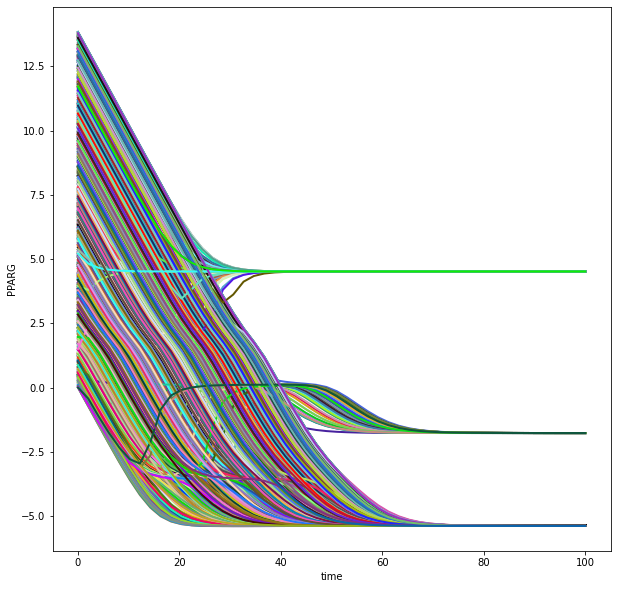

No. of Stable States = 3.0 


In [6]:
t = np.linspace(0,100)
for i in range(1,1000):
    s0 = [2**(20*random.uniform(0,1)),2**(20*random.uniform(0,1)),2**(20*random.uniform(0,1)),2**(20*random.uniform(0,1))]
    s = odeint(f,s0,t)
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)

    plt.plot(t,np.log(s[:,2]),c=color, linewidth=2.0)

plt.xlabel("time")
plt.ylabel("PPARG")
plt.show()
print("No. of Stable States = {} ".format(parm[0]))

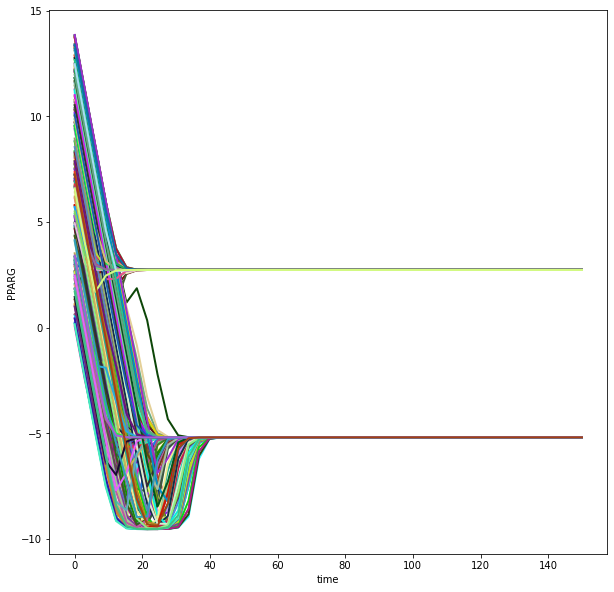

No. of Stable States = 2.0 


In [7]:
parm = par(40)
t = np.linspace(0,150)
for i in range(1,200):
    s0 = [2**(20*random.uniform(0,1)),2**(20*random.uniform(0,1)),2**(20*random.uniform(0,1)),2**(20*random.uniform(0,1))]
    s = odeint(f,s0,t)
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)

    plt.plot(t,np.log(s[:,2]),c=color, linewidth=2.0)

plt.xlabel("time")
plt.ylabel("PPARG")
plt.show()
print("No. of Stable States = {} ".format(parm[0]))

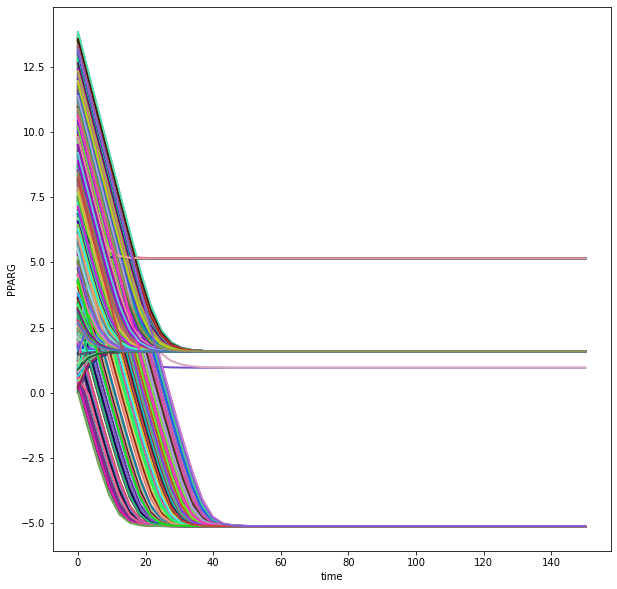

No. of Stable States = 4.0 


In [18]:
parm = par(1)
t = np.linspace(0,150)
for i in range(1,995):
    s0 = [2**(20*random.uniform(0,1)),2**(20*random.uniform(0,1)),2**(20*random.uniform(0,1)),2**(20*random.uniform(0,1))]
    s = odeint(f,s0,t)
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)

    plt.plot(t,np.log(s[:,2]),c=color, linewidth=2.0)

plt.xlabel("time")
plt.ylabel("PPARG")
plt.show()
print("No. of Stable States = {} ".format(parm[0]))

In [9]:
# For Monostable Parameters

th = [0.329,0.0,0.309,0.0]
t = np.linspace(0,150)
count = 0
states = []
state_count = [0,0,0,0]
for i in range(0,1000):
    parm = par(i)
    if(parm[0]==1):
        states.append([0,0,0,0])
        for j in range(1,100):
            s0 = [2**(20*random.uniform(0,1)),2**(20*random.uniform(0,1)),2**(20*random.uniform(0,1)),2**(20*random.uniform(0,1))]
            s = odeint(f,s0,t)
            if (s[-1,0]> th[0]) and (s[-1,2]>th[2]):
                ind = 0
            elif (s[-1,0]> th[0]) and (s[-1,2]<th[2]):
                ind = 1

            elif (s[-1,0]< th[0]) and (s[-1,2]>th[2]): 
                ind = 2

            elif (s[-1,0]< th[0]) and (s[-1,2]<th[2]):
                ind = 3
            
            states[count][ind] = 1
            state_count[ind] += 1/10900
        count = count + 1
            

<BarContainer object of 4 artists>

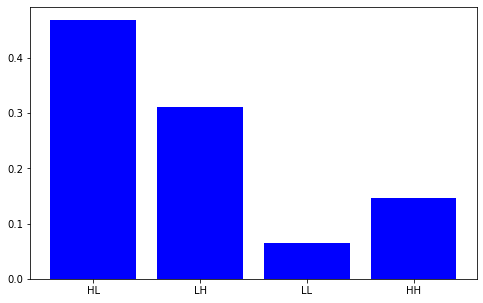

In [10]:
state_count = state_count

datas = {'HL':state_count[1], 'LH':state_count[2],
        'LL':state_count[3],'HH':state_count[0]}
States = list(datas.keys())
values = list(datas.values())
  
fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(States, values, color ='b',
        width = 0.8)

In [11]:
# For Bistable Parameters
th = [0.329,0.0,0.309,0.0]
t = np.linspace(0,150)
count = 0
states22 = []
state_count = [0,0,0,0]
par_count = []
states2 = [0,0,0,0,0]
for i in range(0,1000):
    parm = par(i)
    if(parm[0]==2):
        states22.append([0,0,0,0])
        for j in range(1,100):
            s0 = [2**(20*random.uniform(0,1)),2**(20*random.uniform(0,1)),2**(20*random.uniform(0,1)),2**(20*random.uniform(0,1))]
            s = odeint(f,s0,t)
            if (s[-1,0]> th[0]) and (s[-1,2]>th[2]):
                ind = 0
            elif (s[-1,0]> th[0]) and (s[-1,2]<th[2]):
                ind = 1

            elif (s[-1,0]< th[0]) and (s[-1,2]>th[2]): 
                ind = 2

            elif (s[-1,0]< th[0]) and (s[-1,2]<th[2]):
                ind = 3
            
            states22[count][ind] += 1
            state_count[ind] += 1/24800
        if(states22[count][1] >= 1 and states22[count][2] >= 1):
            states2[0] += 1/248
            par_count.append([i,count]) 
        if(states22[count][3] >= 1 and states22[count][2] >= 1):
            states2[1] += 1/248
        if(states22[count][1] >= 1 and states22[count][3] >= 1):
            states2[2] += 1/248
        if(states22[count][0] >= 1 and states22[count][1] >= 1):
            states2[3] += 1/248
        if(states22[count][0] >= 1 and states22[count][2] >= 1):
            states2[4] += 1/248
            
        count = count + 1            

[0.30241935483870946,
 0.15725806451612892,
 0.13306451612903217,
 0.07661290322580641,
 0.08467741935483866]

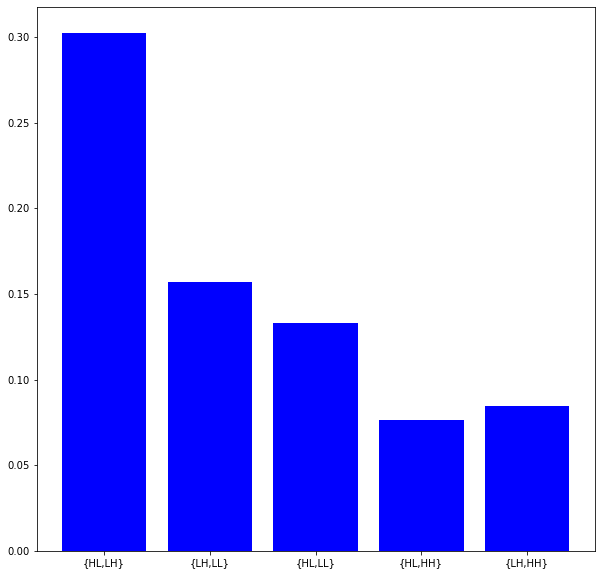

In [12]:
Phases =['{HL,LH}','{LH,LL}','{HL,LL}','{HL,HH}','{LH,HH}']
plt.bar(Phases, states2, color ='b',
        width = 0.8)

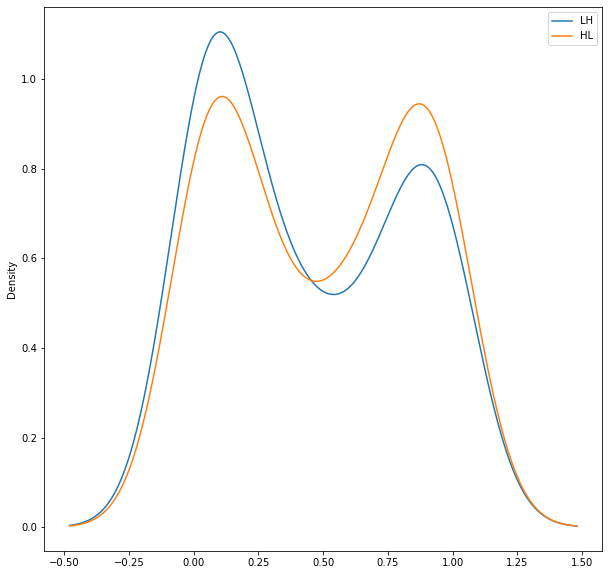

In [14]:
HL = []
LH = []
for i in range(0,len(par_count)):
    HL.append((states22[par_count[i][1]][1])/99)
    LH.append((states22[par_count[i][1]][2])/99)
LH = pd.Series(LH)
HL = pd.Series(HL)

LH.plot.kde()
HL.plot.kde()

plt.legend(labels = ["LH","HL"])



In [15]:
# For Tristable State
th = [0.329,0.0,0.309,0.0]
t = np.linspace(0,150)
count = 0
states = []
state_count = [0,0,0,0]
par_count3 = []
states3 = [0,0,0,0]
for i in range(0,1000):
    parm = par(i)
    if(parm[0]==3):
        states.append([0,0,0,0])
        for j in range(1,100):
            s0 = [2**(20*random.uniform(0,1)),2**(20*random.uniform(0,1)),2**(20*random.uniform(0,1)),2**(20*random.uniform(0,1))]
            s = odeint(f,s0,t)
            if (s[-1,0]> th[0]) and (s[-1,2]>th[2]):
                ind = 0
            elif (s[-1,0]> th[0]) and (s[-1,2]<th[2]):
                ind = 1

            elif (s[-1,0]< th[0]) and (s[-1,2]>th[2]): 
                ind = 2

            elif (s[-1,0]< th[0]) and (s[-1,2]<th[2]):
                ind = 3
            
            states[count][ind] += 1
            state_count[ind] += 1
        if(states[count][1] > 0 and states[count][2] > 0 and states[count][3] > 0):
            states3[0] += 1
        if(states[count][0] >= 1 and states[count][2] >= 1 and states[count][1]>=1):
            states3[1] += 1
            par_count3.append([i,count])


        if(states[count][1] >= 1 and states[count][3] >= 1 and states[count][0] >=1):
            states3[2] += 1
        if(states[count][0] >= 1 and states[count][2] >= 1 and states[count][3] >=1):
            states3[3] += 1
            
        count = count + 1

<BarContainer object of 4 artists>

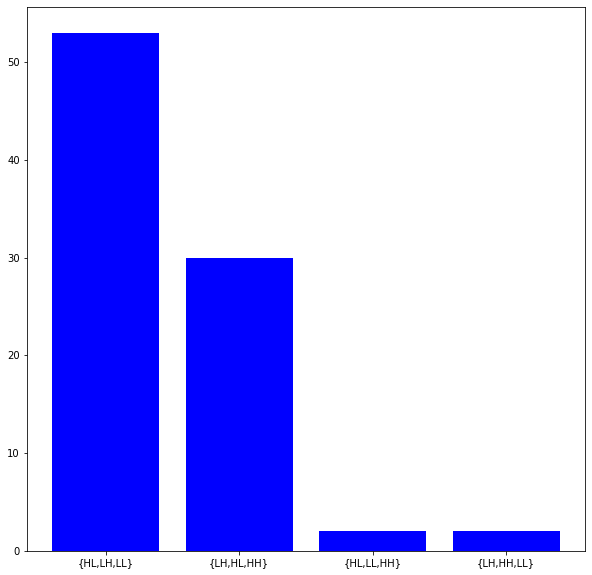

In [16]:
Phases =['{HL,LH,LL}','{LH,HL,HH}','{HL,LL,HH}','{LH,HH,LL}']
plt.bar(Phases, states3, color ='b',
        width = 0.8)



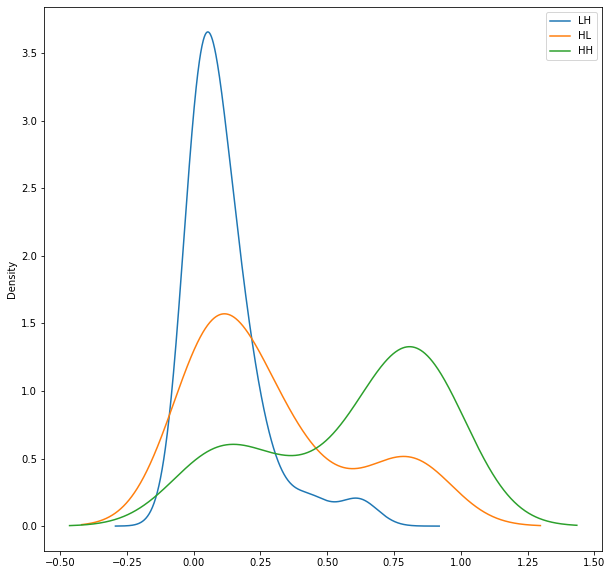

In [17]:
HL = []
LH = []
HH = []
for i in range(0,28):
    HL.append((states[par_count3[i][1]][1])/99)
    LH.append((states[par_count3[i][1]][2])/99)
    HH.append((states[par_count3[i][1]][0])/99)
LH = pd.Series(LH)
HL = pd.Series(HL)
HH = pd.Series(HH)

LH.plot.kde()
HL.plot.kde()
HH.plot.kde()

plt.legend(labels = ["LH","HL","HH"])
